# Motivation
This document is based primarily on the presentation of feedforward networks in *Pattern Recognition and Machine Learning* by Christopher M. Bishop and an object-oriented design from [David Selby](https://selbydavid.com/2018/01/09/neural-network/) who likewise was inspired by Denny Britz. In an algorithms course for my M.S. in Data Science, I was able to successfully program a variety of different algorithms but became frustrated with progress on the feedforward neural network. In the end, I only submitted a solution to the assignment utilizing a neural network package’s function.

To overcome this obstacle, I’ve decided to adapt Bishop’s formulas so that they can be easier to interpret (therefore, this document would likely serve best anyone who is familiar or working with Bishop's text). The work in this document likely has many flaws and so I am open to any criticism. It would be practical to consider this document as a version of a student's notes. The ideal audience are those that are new to neural networks and are interested in developing a quick ability to understand the math and programming aspects of a simple neural network.

*NOTE:* I would't say that this document is yet complete, as there are still tasks related to hyperparameter tuning which were not thoroughly discussed in my course. After I complete an upcoming course dedicated to neural networks, I hope to be able to either update this document or create a new one that includes more relevant information.

# Table of Contents
<a id="top"></a>
1. [Introduction](#introduction)
2. [Brief History](#brief-history)
3. [Biological Connection](#biological-connection)
4. [Feedforward Neural Network](#feedforward-neural-network)
    1. [Forward Propogation](#forward-propogation)
        1. [First Layer](#first-layer)
        2. [Second Layer](#second-layer)
    2. [Error Backpropogation (Backprop)](#backpropogation)
        1. [Gradient Descent](#gradient-descent)
        2. [Gradient of the Second Weight Matrix](#gradient_of_second_weight_matrix)
        3. [Gradient of First Weight Matrix](#gradient_of_first_weight_matrix)
5. [Programming a Feedforward Neural Network](#programming)
5. [Conclusion](#conclusion)

# Introduction
<a id="introduction"></a>
<a href="#top">Back to top</a>

When it comes to regression and classification models, the basics of the approach can be understood using *general linear models* (GLMs) such as *linear regression* and *logistic regression*. However, with higher dimensions, the addition of interaction terms makes it such that the increasing number of interaction terms has an exponential growth. This is problematic and can become an issue computationally where a global optimum is perhaps not discovered when trying to solve for coefficients.

With *artificial neural networks* (ANNs), an approach to overcome this dimensionality problem is to first determine beforehand a set number of basis functions (i.e., similar to the number of regression coefficients ($\beta's$) in linear or logistic regression), then update them through each iteration of an optimization process. Another term for this is *multilayer perceptron*, where the simplest form of an ANN is a *single layer perceptron*. With an understanding of the [perceptron algorithm](https://www.youtube.com/watch?v=4Gac5I64LM4&t=704s), the following document will be much clearer.

The type of ANN that will be discussed is the basic feedforward neural network. There are other classes of ANNs such as: recurrent neural networks (RNN), convolutional neural networks (CNN), autoencoders, etc. Hybrid versions that combine different classes of ANNs can lead to innovations such as self-driving cars.

# Brief History
<a id="brief-history"></a>
<a href="#top">Back to top</a>

ANNs have become quite popular recently due to the prevalence of artificial intelligence in contemporary culture. With advances in computing, this decades old model is being brought back to life. The genius of the neural network model is derived from the structure of neurons in the human brain, a system that has evolved over a period of hundreds of millions of years. In truth, the actual brain is far more complex than what is currently being used in machine learning. However, there is research being done to help bridge the gap through bio-inspired neural networks that are more similar in terms of their complexity. These bio-inspired neural networks require the addition of not just the neural network software that will be covered here, but hardware that utilizes a [specialized A.I.-chip design](https://news.tsinghua.edu.cn/publish/thunewsen/9670/2019/20190810231414401475912/20190810231414401475912_.html).

# Biological Connection
<a id="biological-connection"></a>
<a href="#top">Back to top</a>

If you think about other statistical algorithms, they are often based on some sort of mathematical premises that help in the process of prediction. Neural networks are somewhat different, instead they are based on the biological structure of a neuron, which can be found in places such as human brains. The neuron itself has a structure which allows for it to perform functions that scientists would like to mimic. For example, we want to design machines that can recognize objects as well as the human eye together brain can.

So the effect is that we utilize [math formulas](https://www.researchgate.net/figure/Biological-Neuron-and-Artificial-Neural-Network_fig1_264149447) that are mimic the [basic structure](https://biology.stackexchange.com/questions/22011/neurons-with-thousands-of-connections-where-are-the-extra-connections-coming-fr) of the neuron. I tried to create a diagram of what will be explained further below in our two-layer neural network. The two-layers refer to the two weight matrices, but in the deep learning community there is various jargon for this and so it can be called other names. The diagram itself refers to the formula of the feedforward process for the first observation, $\textbf{x}_1^\top = [x_{1,1}, x_{1,2}, \cdots,x_{1,D}]$.

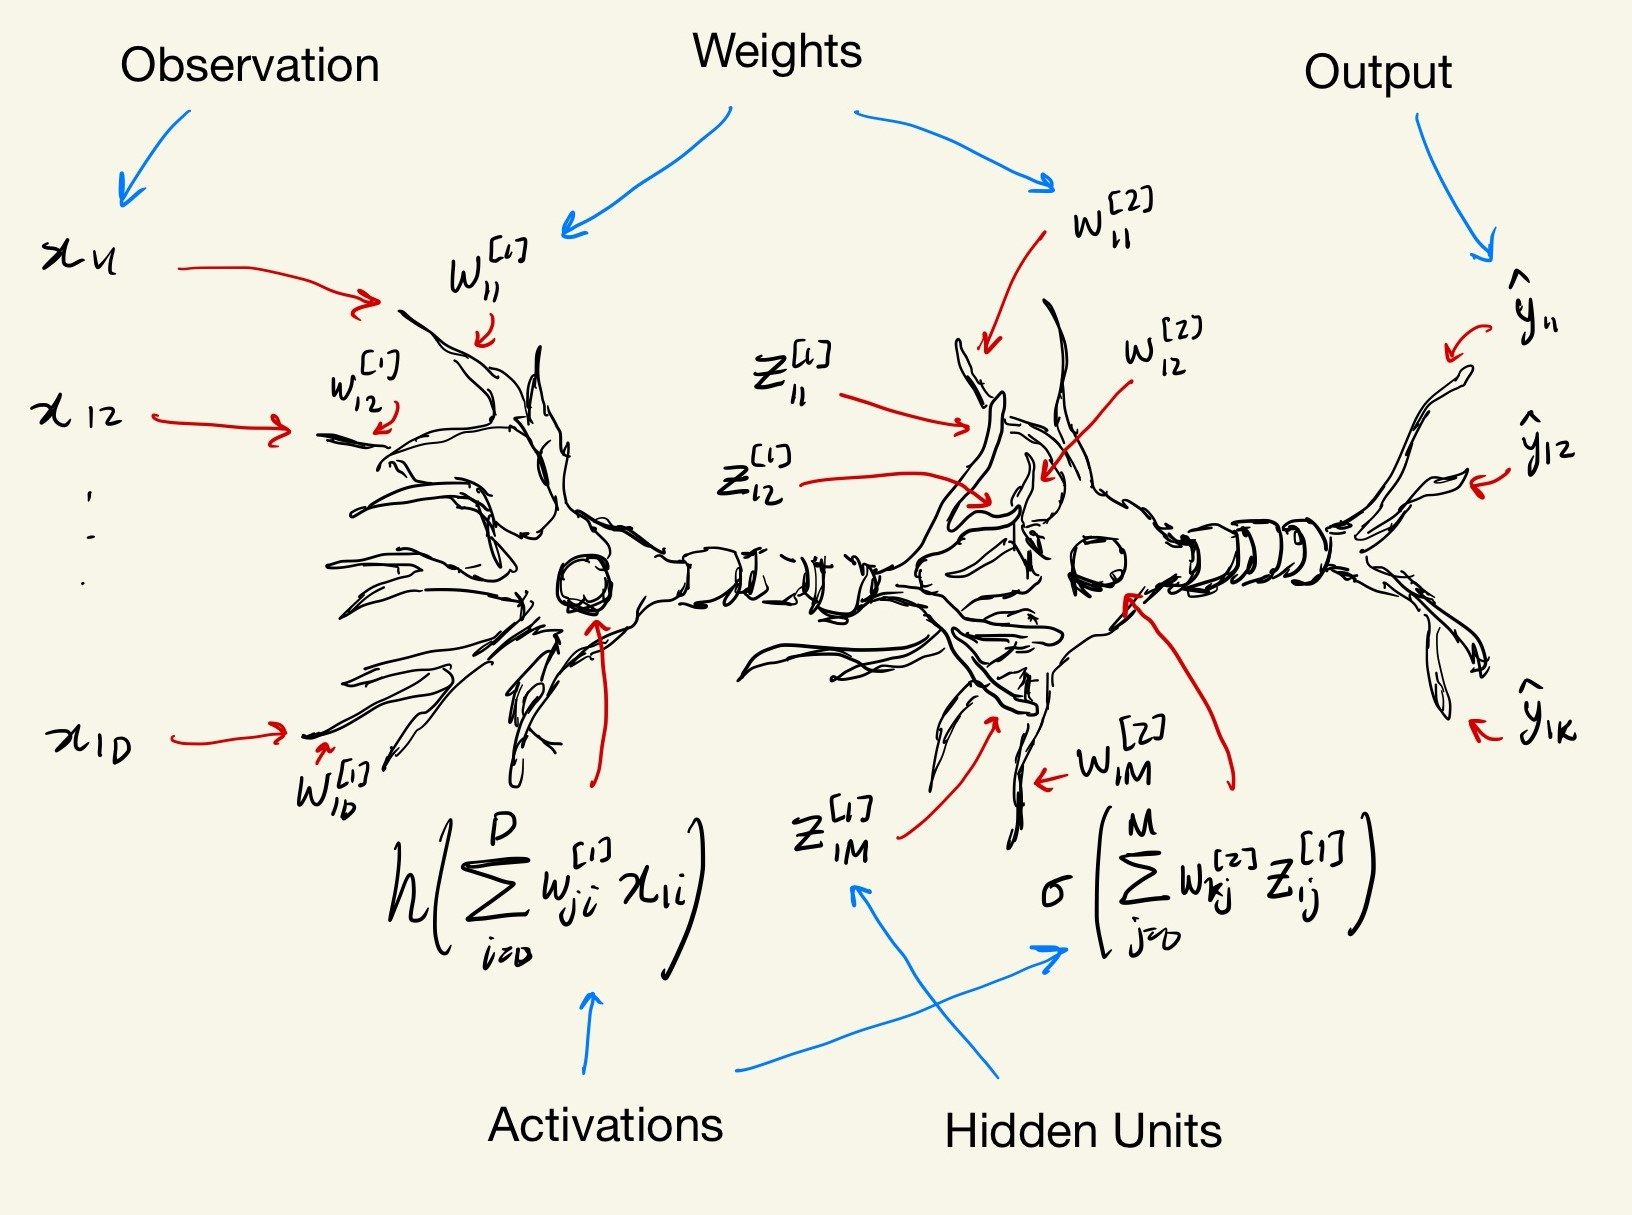

In [1]:
from IPython.display import Image
import os
Image("../input/neural_network_diagram.jpg")

At this stage, the math and notation likely doesn't make sense which is expected. To me, they were nonintuitive at first despite their apparent simplicity. In later paragraphs I will try to break down the formula into simple to understand matrix representations so that from a programming perspective, it will become much clearer what we are trying to implement.

# Feedforward Neural Network
## Forward Propogation
<a id="forward-propogation"></a>
<a href="#top">Back to top</a>

To understand the feedforward neural network (along with Bishop’s notation which can be initially counter intuitive), let’s examine the mathematical model of linear regression and bridge the gap from there. In *simple linear regression* (SLR), with $N$ pairs of $(y_n,x_n)$ sample data points, the SLR model appears as follows,
\begin{equation}
y_{n}=\beta_{0}+\beta_{1} x_{n}+\varepsilon_{n}, \quad n=1, \cdots, N.
\end{equation}
Extending this to *multiple linear regression* (MLR), the model evolves into,
\begin{equation}
y_{n}=\beta_{0}+\beta_{1} x_{n, 1}+\beta_{2} x_{n, 2}+\cdots+\beta_{D} x_{n, D}+\varepsilon_{n}=\mathbf{x}_{n}^{\top} \boldsymbol{\beta}+\varepsilon_{n}, \quad n=1, \cdots, N,
\end{equation}
where $D$ is the total number of features in the model (excluding the target variable). Using matrix notation, the full set of inputs, outputs, coefficients, and errors in MLR can be expressed as,
\begin{equation}
\mathbf{y}=\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon} \rightarrow
\left[\begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\vdots} \\ {y_{N}}\end{array}\right]=
\left[\begin{array}{c}{\mathbf{x}_{1}^{\top}} \\ {\mathbf{x}_{2}^{\top}} \\ {\vdots} \\ {\mathbf{x}_{N}^{\top}}\end{array}\right]
\left[\begin{array}{c}{\beta_{0}} \\ {\beta_{1}} \\ {\beta_{2}} \\ {\vdots} \\ {\beta_{D}}\end{array}\right]+
\left[\begin{array}{c}{\varepsilon_{1}} \\ {\varepsilon_{2}} \\ {\vdots} \\ {\varepsilon_{N}}\end{array}\right]
\end{equation}

\begin{equation}
=\left[\begin{array}
{cccc}
{1} & {x_{1,1}} & {\cdots} & {x_{1, D}} \\
{1} & {x_{2,1}} & {\cdots} & {x_{2, D}} \\
{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
{1} & {x_{N, 1}} & {\cdots} & {x_{N, D}}
\end{array}\right]
\left[\begin{array}
{c}{\beta_{0}} \\ {\beta_{1}} \\ {\beta_{2}} \\ {\vdots} \\ {\beta_{D}}
\end{array}\right]
+
\left[\begin{array}
{c}{\varepsilon_{1}} \\ {\varepsilon_{2}} \\ {\vdots} \\ {\varepsilon_{N}}
\end{array}\right]
\end{equation}

\begin{equation}
=\left[\begin{array}{c}{\beta_{0}+\beta_{1} x_{1,1}+\beta_{2} x_{1,2}+\cdots+\beta_{D} x_{1, D}+\varepsilon_{1}} \\ {\beta_{0}+\beta_{1} x_{2,1}+\beta_{2} x_{2,2}+\cdots+\beta_{D} x_{2, D}+\varepsilon_{2}} \\ {\vdots} \\ {\beta_{0}+\beta_{1} x_{N, 1}+\beta_{2} x_{N, 2}+\cdots+\beta_{D} x_{N, D}+\varepsilon_{N}}\end{array}\right]
\end{equation}
*NOTE:* A trick is utilized to incorporate the intercept (i.e. $\beta_0$) by adding a column of $1's$ to the data matrix, to form a design matrix, this same trick will be utilized later. In this case $x_{n,i}=1$ for $i=0$ and $n=1,\cdots,N$.

Another way of expressing the MLR model is as follows,
\begin{equation}
y_{n}\left(\mathbf{x}_{n}, \boldsymbol{\beta}\right)=h\left(\beta_{0}+\sum_{i=1}^{D} \beta_{i} x_{n, i}\right), \quad n=1, \cdots, N ; i=1, \cdots, D.
\end{equation}

The addition of the function $h(\cdot)$ makes sense in the case that it is simply an identity function (i.e., $h\left(\beta_{0}+\sum_{i=1}^{D} \beta_{i} x_{n, i}\right)=\beta_{0}+\sum_{i=1}^{D} \beta_{i} x_{n, i}$). The addition of the function $h(\cdot)$, however, gives us insight into the possibilities that are explored in a feedforward neural network. Rather than the data simply being a linear combination of variables and regression coefficients, we are describing that relationship as merely the first ‘layer’ of connections. This is not too different however from what is done in logistic regression with the use of a sigmoid function in place of $h(\cdot)$. The only change is that multiple functions, $h_1(\cdot),\text{ }h_2(\cdot),\text{ }h_3(\cdot)$, etc. of various types and combinations are utilized for a neural network consisting of multiple layers.

As a note, here we will focus on classification, so ultimately, for each observation the function will have $K$ outputs, where $K$ is equal to the total number of classes. This is different from MLR, where the output per observation is just a single value. The output function $y_n(\cdot)$ then will have an added index $y_{n,k}(\cdot)$ Simply put, here we will focus on categorical data rather than continuous data.

### First Layer
<a id="first-layer"></a>
 <a href="#top">Back to top</a>

The analogy of layers will be elaborated on as follows. Let’s call the portion inside $h(\cdot)$ as an activation, denoted by $a_{n,j}^{[1]}$,using a $j$ subscript for the first layer’s activation. While $h(\cdot)$ will be considered the activation function for the first layer. So, $a_{n,j}^{[1]}$, the $j'th$ activation of the $n'th$ observation in the first layer, can be written as,
\begin{equation}
a_{n, j}^{[1]}=w_{j, 0}^{[1]}+\sum_{i=1}^{D} w_{j, i}^{[1]} x_{n, i}, \quad n=1, \cdots, N ; i=1, \cdots, D ; j=1, \cdots, M,
\end{equation}
where $M$ is the number of hidden layers in the second activation function, $h(\cdot)$ (an explanation for how to choose M will be explained later). Above, the regression coefficients ($\beta_i's$) have been changed to weights denoted as $w_{j,i}^{[1]}$, with the superscript of $[1]$ indicating the index of the current layer. As the regression coefficients become weights, an additional subscript of $j$ is included. It will become clear soon how the feedforward neural network can be computationally more expensive compared to MLR.

The same trick used to manage the intercept term (i.e., $\beta_0$) in MLR by adding a column of $1's$ to the data matrix is also applied in this case. The above formula can then be rewritten as follows,
\begin{equation}
a_{n, j}^{[1]}=\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}, \quad n=1, \cdots, N ; i=0, \cdots, D ; j=1, \cdots, M.
\end{equation}

So, when $i=0$, $x_{n,i}=1$, for $n=1,\cdots,N$ (e.g. like the design matrix $\boldsymbol{X}$). Additionally, in ANNs, the intercept term from linear regression is known instead as a bias term (e.g., $w_{j,0}^{[1]}$ for the first layer). As layers are added to the neural network, the model becomes more and more complicated. We can begin with showing how to derive the matrix of $a_{n,j}^{[1]}$ terms. Let the design matrix,
\begin{equation}
\boldsymbol{X}=\underbrace{\left[\begin{array}{cccc}{1} & {x_{1,1}} & {\cdots} & {x_{1, D}} \\ {1} & {x_{2,1}} & {\cdots} & {x_{2, D}} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {1} & {x_{N, 1}} & {\cdots} & {x_{N, D}}\end{array}\right]}_{N \times(D+1)},
\end{equation}

and the first layer weight matrix (where $[1]$ indicates which layer the weight matrix belongs to),

\begin{equation}
\mathbf{W}^{[1]}=\underbrace{
	\left[\begin{array}{cccc}
	{w_{1,0}^{[1]}} & {w_{2,0}^{[1]}} & {\dots} & {w_{M, 0}^{[1]}} \\
	{w_{1,1}^{[1]}} & {w_{2,1}^{[1]}} & {\dots} & {w_{M, 0}^{[1]}} \\
	{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	{w_{1, D}^{[1]}} & {w_{2, D}^{[1]}} & {\cdots} & {w_{M, D}^{[1]}} \\
	\end{array}\right]}_{(D+1)\times M}.
\end{equation}

Then the terms are $x_{n,i}$ and $w_{j,i}$, $n=1,\cdots,N; i=0,\cdots,D; j=1,\cdots,M$, whose matrix product leads to $a_{n,j}^{[1]}$, $n=1,\cdots,N; j=1,\cdots,M$ can be expressed as follows,

\begin{equation}
\boldsymbol{X} \times \mathbf{W}^{[1]}
\end{equation}

\begin{equation}
=\underbrace{
		\left[\begin{array}{cccc}
		{1} & {x_{1,1}} & {\cdots} & {x_{1, D}} \\
		{1} & {x_{2,1}} & {\cdots} & {x_{2, D}} \\
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{1} & {x_{N, 1}} & {\cdots} & {x_{N, D}}
		\end{array}\right]
	}_{N \times(D+1)} \times
	\underbrace{
		\left[\begin{array}{cccc}
		{w_{1,0}^{[1]}} & {w_{2,0}^{[1]}} & {\dots} & {w_{M, 0}^{[1]}} \\
		{w_{1,1}^{[1]}} & {w_{2,1}^{[1]}} & {\dots} & {w_{M, 0}^{[1]}} \\
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{w_{1, D}^{[1]}} & {w_{2, D}^{[1]}} & {\cdots} & {w_{M, D}^{[1]}} \\
		\end{array}\right]
	}_{(D+1)\times M} \\
\end{equation}
\begin{equation}
	=\underbrace{\left[\begin{array}{cccc}
	{\sum_{i=0}^{D} x_{1, i} w_{1, i}^{[1]}} & {\sum_{i=0}^{D} x_{1, i} w_{2, i}^{[1]}} & {\ldots} & {\sum_{i=0}^{D} x_{1, i} w_{M, i}^{[1]}} \\
	{\sum_{i=0}^{D} x_{2, i} w_{1, i}^{[1]}} & {\sum_{i=0}^{D} x_{2, i} w_{2, i}^{[1]}} & {\cdots} & {\sum_{i=0}^{D} x_{2, i} w_{M, i}^{[1]}} \\
	{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	{\sum_{i=0}^{D} x_{N, i} w_{1, i}^{[1]}} & {\sum_{i=0}^{D} x_{N, i} w_{2, i}^{[1]}} & {\cdots} & {\sum_{i=0}^{D} x_{N, i} w_{M, i}^{[1]}}
	\end{array}\right]}_{N\times M} \\
\end{equation}
\begin{equation}
=\underbrace{
	\left[\begin{array}{cccc}
	{a_{1,1}^{[1]}} & {a_{1,2}^{[1]}} & {\dots} & {a_{1, N}^{[1]}} \\
	{a_{2,1}^{[1]}} & {a_{2,2}^{[1]}} & {\dots} & {a_{2, M}^{[1]}} \\
	{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	{a_{N, 1}^{[1]}} & {a_{N, 2}^{[1]}} & {\cdots} & {a_{N, M}^{[1]}} \\
	\end{array}\right]}_{N \times M}=\textbf{A}^{[1]}.
\end{equation}

where we can call $\textbf{A}^{[1]}$ the matrix of first layer activations. The activation function $h(\cdot)$ is applied to this entire matrix. The choice of activation functions is not trivial, but it will be discussed later. Then wrapping the matrix of first layer activations with the corresponding activation function, the following expression is derived,

\begin{equation}
	z_{n, j}^{[1]}=h\left(a_{n, j}^{[1]}\right)=h\left(\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}\right),
\end{equation}

where $z_{n,j}^{[1]}$ is known as a *hidden unit*. To better understand these hidden units, let’s look back at $\boldsymbol{X} \times \mathbf{W}^{[1]}$. From these matrices, it’s apparent that depending on the user’s choice of $M$, the total number of hidden units can become quite large.

Thinking back to linear regression, given a set of sample data, the regression coefficients (i.e. $\beta_i's$) are deterministic (i.e., not random) and change depending on the sample dataset. Here, there are $M$ weights per parameter. Although these weights are optimized based on the data, they must be initialized to some random value. In that sense, the results for optimized weights is stochastic (i.e., random). From a programming standpoint, an efficient way to work with this structure is using object-oriented programming (OOP) rather than functional programming. This will be shown later.

### Second Layer
<a id="second-layer"></a>
 <a href="#top">Back to top</a>
 
Now, let’s examine the activations in the second layer, $a_{n,k}^{[2]}$. The second activation can be written as follows,
\begin{equation}
{a_{n, k}^{[2]} =
		w_{k, 0}^{[2]} + \sum_{j=1}^{M} w_{k j}^{[2]} h \left(\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}\right)} \\ {n=1, \cdots, N ; i=0, \cdots, D ; j=1, \cdots, M ; k=1, \cdots, K}
\end{equation}

Again, we can absorb the bias term $w_{k,0}^{[2]}$ into the rest of the summation using the same The formula for the second layer activations then becomes,
\begin{equation}
{a_{n, k}^{[2]}=\sum_{j=0}^{M} w_{k, j}^{[2]} h\left(\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}\right)} \\ {n=1, \cdots, N ; i=0, \cdots, D ; j=0, \cdots, M ; k=1, \cdots, K}
\end{equation}

So, when $j=0$, $h(\sum_{i=0}^D w_{j,i}^{[1]} x_{n,i} )=1$, for $n=1,\cdots,N$. Unike $M$, $K$ is a value determined by the number of classes trying to be predicted. To understand the matrix representation of the matrix of second layer activations, $\textbf{A}^{[2]}$, let’s go back to $\textbf{A}^{[1]}$,

\begin{equation}
	\textbf{A}^{[1]}=
	\underbrace{
		\left[\begin{array}{cccc}
		{a_{1,1}^{[1]}} & {a_{1,2}^{[1]}} & {\dots} & {a_{1, M}^{[1]}} \\
		{a_{2,1}^{[1]}} & {a_{2,2}^{[1]}} & {\dots} & {a_{2, M}^{[1]}} \\
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{a_{N, 1}^{[1]}} & {a_{N, 2}^{[1]}} & {\cdots} & {a_{N, M}^{[1]}} \\
		\end{array}\right]
	}_{N \times M}
\end{equation}

By wrapping the function $h(\cdot)$ to this matrix, we are left with,

\begin{equation}
	\underbrace{
		\left[\begin{array}{cccc}
		{h\left(a_{1,1}^{[1]}\right)} & {h\left(a_{1,2}^{[1]}\right)} & {\dots} & {h\left(a_{1, M}^{[1]}\right)} \\ 
		{h\left(a_{2,1}^{[1]}\right)} & {h\left(a_{2,2}^{[1]}\right)} & {\dots} & {h\left(a_{2, M}^{[1]}\right)} \\ 
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{h\left(a_{N, 1}^{[1]}\right)} & {h\left(a_{N, 2}^{[1]}\right)} & {\cdots} & {h\left(a_{N, M}^{[1]}\right)}
		\end{array}\right]
	}_{N \times M}
\end{equation}

which only represents the $z_{n,j}^{[1]}$, $n=1,\cdots,N$ and $j=1,\cdots,M$ portion of the formula for the layer of hidden units. To account for the bias term (i.e., $j=0$), a column of $1's$ is included on the left-hand side to create the matrix of first layer hidden units, $\textbf{Z}^{[1]}$,

\begin{equation}
\textbf{Z}^{[1]}
		=\underbrace{
		\left[\begin{array}{ccccc}
		1 & {h\left(a_{1,1}^{[1]}\right)} & {h\left(a_{1,2}^{[1]}\right)} & {\dots} & {h\left(a_{1, M}^{[1]}\right)} \\ 
		1 & {h\left(a_{2,1}^{[1]}\right)} & {h\left(a_{2,2}^{[1]}\right)} & {\dots} & {h\left(a_{2, M}^{[1]}\right)} \\ 
		{\vdots} & {\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		1 & {h\left(a_{N, 1}^{[1]}\right)} & {h\left(a_{N, 2}^{[1]}\right)} & {\cdots} & {h\left(a_{N, M}^{[1]}\right)}
		\end{array}\right]
	}_{N \times (M+1)}
=\underbrace{
	\left[\begin{array}{ccccc}
	1 & {z_{1,1}^{[1]}} & {z_{1,2}^{[1]}} & {\dots} & {z_{1, M}^{[1]}} \\
	1 & {z_{2,1}^{[1]}} & {z_{2,2}^{[1]}} & {\dots} & {z_{2, M}^{[1]}} \\
	{\vdots} & {\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	1 & {z_{N, 1}^{[1]}} & {z_{N, 2}^{[1]}} & {\cdots} & {z_{N, M}^{[1]}} \\
	\end{array}\right]
}_{N \times (M+1)}
\end{equation}

where $z_{n,j}^{[1]}=1$ for $n=1,\cdots,N$ and $j=0$. The matrix before the bias column is added is important and will be used later. Then, to calculate the matrix of second layer activations, $\textbf{A}^{[2]}$, we must calculate the matrix product of $\textbf{Z}^{[1]}$ and $\textbf{W}^{[2]}$. So, using the terms, $z_{n,j}^{[1]}$, $n=1,\cdots,N$, $j=0,\cdots,M$ and $w_{k,j}^{[2]}$, $j=0,\cdots,M$, $k=1,\cdots,K$, the following is their matrix product,

\begin{equation}
	\mathbf{Z}^{[1]} \times \mathbf{W}^{[2]} 
=\underbrace{
	\left[\begin{array}{ccccc}
	1 & {z_{1,1}^{[1]}} & {z_{1,2}^{[1]}} & {\dots} & {z_{1, M}^{[1]}} \\
	1 & {z_{2,1}^{[1]}} & {z_{2,2}^{[1]}} & {\dots} & {z_{2, M}^{[1]}} \\
	{\vdots} & {\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	1 & {z_{N, 1}^{[1]}} & {z_{N, 2}^{[1]}} & {\cdots} & {z_{N, M}^{[1]}} \\
	\end{array}\right]
}_{N \times (M+1)} \times
\underbrace{
	\left[\begin{array}{cccc}
	{w_{1,0}^{[2]}} & {w_{2,0}^{[2]}} & {\dots} & {w_{K, 0}^{[2]}} \\
	{w_{1,1}^{[2]}} & {w_{2,1}^{[2]}} & {\dots} & {w_{K, 1}^{[2]}} \\
	{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	{w_{1, M}^{[2]}} & {w_{2, M}^{[2]}} & {\cdots} & {w_{K, M}^{[2]}} \\
	\end{array}\right]
}_{(M+1)\times K}
\end{equation}

\begin{equation}
	=\underbrace{\left[\begin{array}{cccc}
		{\sum_{j=0}^{M} z^{[1]}_{1, j} w_{1, j}^{[2]}} & {\sum_{j=0}^{M} z^{[1]}_{1, j} w_{2, j}^{[2]}} & {\ldots} & {\sum_{j=0}^{M} z^{[1]}_{1, j} w_{K, j}^{[2]}} \\
		{\sum_{j=0}^{M} z^{[1]}_{2, j} w_{1, j}^{[2]}} & {\sum_{j=0}^{M} z^{[1]}_{2, j} w_{2, j}^{[2]}} & {\cdots} & {\sum_{j=0}^{M} z^{[1]}_{2, j} w_{K, j}^{[2]}} \\
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{\sum_{j=0}^{M} z^{[1]}_{N, j} w_{1, j}^{[2]}} & {\sum_{j=0}^{M} z^{[1]}_{N, j} w_{2, j}^{[2]}} & {\cdots} & {\sum_{j=0}^{M} z^{[1]}_{N, j} w_{K, j}^{[2]}}
		\end{array}\right]}_{N\times K}
\end{equation}
\begin{equation}
=
\underbrace{
	\left[\begin{array}{cccc}
	{a_{1,1}^{[2]}} & {a_{1,2}^{[2]}} & {\dots} & {a_{1, K}^{[2]}} \\
	{a_{2,1}^{[2]}} & {a_{2,2}^{[2]}} & {\dots} & {a_{2, K}^{[2]}} \\
	{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
	{a_{N, 1}^{[2]}} & {a_{N, 2}^{[2]}} & {\cdots} & {a_{N, K}^{[2]}} \\
	\end{array}\right]
}_{N \times K} =
\textbf{A}^{[2]}
\end{equation}

This completes the matrix of second layer activations. Since we are only developing a two-layer neural network, only one more final activation function is needed. In this example, we will be doing multi-class classification, and so a softmax function will be chosen as the final activation function (in the case of binary classification, a sigmoid function would be utilized). Wrapping the matrix of second layer activations with the corresponding activation function, $\sigma(\cdot)$, the following expression is derived,

\begin{equation}
	\hat{y}_{n,k}\left(\textbf{x}_n, \textbf{W}^{[1]}, \textbf{W}^{[2]}\right) = \sigma\left(a_{n, k}^{[2]}\right)=\sigma\left(\sum_{j=0}^{M} w_{k, j}^{[2]} h\left(\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}\right)\right),
\end{equation}

where the softmax function is used as follows,

\begin{equation}
\hat{y}_{n,k}\left(\textbf{x}_n, \textbf{W}^{[1]}, \textbf{W}^{[2]}\right) = \frac{exp(a_{n,k}^{[2]})}{\sum_{j=0}^{M}exp(a_{n,j}^{[1]})}.
\end{equation}

The matrix representation of the final output then is as follows,



\begin{equation}
	\Rightarrow \text{Applying } \sigma(\cdot) \text{ to each element of }\textbf{A}^{[2]}=
\underbrace{
	\begin{bmatrix}
	\sigma(a^{[2]}_{1,1}) & \sigma(a^{[2]}_{1,2}) & \cdots & \sigma(a^{[2]}_{1,K}) \\ 
	\sigma(a^{[2]}_{2,1}) & \sigma(a^{[2]}_{2,2}) & \cdots & \sigma(a^{[2]}_{2,K}) \\
	\vdots & \vdots & \ddots & \vdots \\ 
	\sigma(a^{[2]}_{N,1}) & \sigma(a^{[2]}_{N,2}) & \cdots & \sigma(a^{[3]}_{N,K})
	\end{bmatrix}
	}_{N\times K}
\end{equation}
\begin{equation}
=\underbrace{\begin{bmatrix}
	\hat{y}_{1,1}(\textbf{x}_1, \textbf{W}^{[1]}, \textbf{W}^{[2]}) & \hat{y}_{1,2}(\textbf{x}_1, \textbf{W}^{[1]}, \textbf{W}^{[2]}) & \cdots & \hat{y}_{1,K}(\textbf{x}_1, \textbf{W}^{[1]}, \textbf{W}^{[2]}) \\ 
	\hat{y}_{2,1}(\textbf{x}_2, \textbf{W}^{[1]}, \textbf{W}^{[2]}) & \hat{y}_{2,2}(\textbf{x}_2, \textbf{W}^{[1]}, \textbf{W}^{[2]}) & \cdots & \hat{y}_{2,K}(\textbf{x}_2, \textbf{W}^{[1]}, \textbf{W}^{[2]}) \\
	\vdots & \vdots & \ddots & \vdots \\ 
	\hat{y}_{N,1}(\textbf{x}_N, \textbf{W}^{[1]}, \textbf{W}^{[2]})) & \hat{y}_{N,2}(\textbf{x}_N, \textbf{W}^{[1]}, \textbf{W}^{[2]}) & \cdots & \hat{y}_{N,L}(\textbf{x}_N, \textbf{W}^{[1]}, \textbf{W}^{[2]})
	\end{bmatrix}}_{N\times K}
=\mathbf{\hat{Y}}.
\end{equation}

This completes the steps during forward propagation stage, which is comparatively much easier than the backpropagation stage.

## Error Backpropogation (Backprop)
<a id="backpropogation"></a>
<a href="#top">Back to top</a>

In the forward propagation stage, we began with weight matrices that have been randomly initialized. Running through the feed-forward system once would result in useless results. The ANN must go through a second stage called *error backpropagation* or *backprop*. We must first utilize an error function to continuously try to improve through each iteration of the feedforward process. If you are familiar with the perceptron algorithm, this process should be familiar.

This stage is comparatively difficult, as it requires going backwards through the system to calculate the gradients for each weight matrix. Depending on the number of hidden layers and activation functions chosen, the required gradients will vary. The gradients are high dimension derivatives and so mistakes are easy to make.

So far, we have not made much mention of the target variable, $\textbf{y}$ (bold, non-italicized), which in this presentation we can think of as a single $N\times1$ vector that denotes the class of each observation. The vector of $\textbf{y}$ appears as follows,

\begin{equation}
	\mathbf{y}=\underbrace{\left[\begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\vdots} \\ {y_{N}} \\\end{array}\right]}_{N\times 1}
\end{equation}

where $y_n \in \{1,2,\cdots,K\}$ for $n=1,\cdots,N$. The value of $y_n$ reflects the corresponding class that the $n'th$ observation belongs to. One-hot encoding will be used separate the classes of $\textbf{y}$ into a $N\times K$ true-label matrix, $\textbf{T}$, where each row of the matrix is a $1\times K$ vector, $\textbf{t}_n$, and each element of the vector is a value $t_{n,k} \in \{0,1\}$. An example of the matrix is as follows,

\begin{equation}
	\textbf{T}=\underbrace{\left[\begin{array}{ccc}{1} & {0} & {0} \\ {0} & {1} & {0} \\ {\vdots} & {\vdots} & {\vdots} \\ {0} & {0} & {1}\end{array}\right]}_{N \times(K=3)}
\end{equation}

where the first row indicates that the first observation belongs to class 1, the second row belongs to class 2, and the last row belongs to class 3.

Below is the cross-entropy error function, which utilizes the above notation,



\begin{equation}
	E\left(\boldsymbol{X}, \mathbf{W}^{[1]}, \mathbf{W}^{[2]}\right)=-\sum_{n=1}^{N}\left[\textbf{t}_{n} \ln \widehat{\textbf{y}}_{n}+\left(1-\textbf{t}_{n}\right) \ln \left(1-\widehat{\textbf{y}}_{n}\right)\right].
\end{equation}

In the standard multiclass classification problem, with $K\geq 3$ mutually exclusive classes, the error function becomes,

\begin{equation}
	E\left(\boldsymbol{X}, \mathbf{W}^{[1]}, \mathbf{W}^{[2]}\right)=-\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n, k} \ln \hat{y}_{n, k}\left(\mathbf{x}_{n}, \mathbf{W}^{[1]}, \mathbf{W}^{[2]}\right)
\end{equation}

There are further error functions, such as sum-of-squares, and the choice of error function is relevant towards the type of problem at hand. For example, whether it is regression, binary classification, or multiclass classification. The focus here will be on multiclass classification, so the last error function will be used. The error function is used to determine how close the predictions are to the true labels. Through many iterations the goal is to minimize the result of the error function which is known as the *loss*. After having chosen the error function the next step is to understand how to update the weight matrices which is done via *gradient descent*.

### Gradient Descent
<a id="gradient-descent"></a>
<a href="#top">Back to top</a>

Before moving forward, let’s take a quick look at a map of how the forward propagation process works:

\begin{equation}
\begin{matrix}
\text{input} & w^{[1]}_{j,i} & \text{hidden units} & w^{[2]}_{k,j} & \text{output} \\ 
x_{i} & \underbrace{\rightarrow}_{h(\cdot)} & z^{[1]}_j & \underbrace{\rightarrow}_{\sigma(\cdot)} & y_{k}
\end{matrix}
\end{equation}

In the forward propagation phase, the algorithm has only so far initialized a random set of weight matrices to some values and utilized these random values to determine some predicted labels for each observation. Without the backprop phase, the results will be meaningless. During the backprop phase, the weight matrices are updated as follows, via a process called gradient descent. For convenience, the set of weight matrices, $\textbf{W}^{[1]}$ ,$\textbf{W}^{[2]}$, will simply be referred to as $\textbf{W}$. The formula for gradient descent is as follows,

\begin{equation}
	\mathbf{W}^{(\tau+1)}=\mathbf{W}^{(\tau)}-\eta \nabla E\left(\boldsymbol{X}, \mathbf{W}^{(\tau)}\right),
\end{equation}

where the superscript $(\tau)$ indicates the current iteration of the feedforward process and $\eta > 0$ is known as the learning rate. The difficulty comes with evaluating the $\nabla E$ for each of the weight matrices in the ANN. This step is done ‘backwards,’ where the derivative of the error function is calculated with respect to each of the elements in $\textbf{W}^{[2]}$ , then again with respect to each of the elements $\textbf{W}^{[1]}$.

### Gradient of the Second Weight Matrix
<a id="gradient_of_second_weight_matrix"></a>
<a href="#top">Back to top</a>

To understand the complexity of the process of computing the gradients, let’s try to imagine what the first gradient that we need to calculate looks like. The error function $E(\cdot)$ itself is simply one constant value once computed. However, we can compute the derivative of the formula with respect to each of the elements of the weight matrix  $\textbf{W}^{[2]}$. This second layer gradient would appear as,

\begin{equation}
	\frac{\partial E_n}{\partial w_{k,j}^{[2]}}\Rightarrow
	\underbrace{\begin{bmatrix}
		\frac{\partial E_n}{\partial w_{1,0}^{[2]}} & \frac{\partial E_n}{\partial w_{2,0}^{[2]}} & \cdots  & \frac{\partial E_n}{\partial w_{K,0}^{[2]}} \\ 
		\frac{\partial E_n}{\partial w_{1,1}^{[2]}} & \frac{\partial E_n}{\partial w_{2,1}^{[2]}} & \cdots & \frac{\partial E_n}{\partial w_{K,1}^{[2]}} \\
		\vdots & \vdots & \ddots & \vdots \\ 
		\frac{\partial E_n}{\partial w_{1,M}^{[2]}} & \frac{\partial E_n}{\partial w_{2,M}^{[2]}} & \cdots & \frac{\partial E_n}{\partial w_{K,M}^{[2]}} 
		\end{bmatrix}}_{(M+1)\times K},
\end{equation}

where the gradient of the weight matrix in the second layer has the same dimensions of the original matrix itself. This is also known as a Jacobian matrix, since we are taking the first partial derivative only. To compute the gradient then, we must solve the derivative for each of these elements. If done poorly, this can be computationally time consuming. So, it’s important to work carefully to develop a method which can solve the gradients in an efficient manner. Let’s first look at how to solve any one of the elements $k,j$ individually.

The error for a single observation is as follows, where the summation over all $N$ terms is removed,

\begin{equation}
	E_{n}=-\sum_{k=1}^{K} t_{n, k} \ln \hat{y}_{n, k}\left(\mathbf{x}_{n}, \mathbf{W}^{[1]}, \mathbf{W}^{[2]}\right).
\end{equation}

This can be further rewritten by expanding the output function $\hat{y}_{n, k}(\cdot)$,

\begin{equation}
E_{n}=-\sum_{k=1}^{K} t_{n, k} \ln \sigma\left(a_{n, k}^{[2]}\right)=-\sum_{k=1}^{K} t_{n, k} \ln \sigma\left(\sum_{j=0}^{M} z_{n, j}^{[1]} w_{k, j}^{[2]}\right)=-\sum_{k=1}^{K} t_{n, k} \ln \sigma\left(\sum_{j=1}^{M} h\left(a_{n, j}^{[1]}\right) w_{k, j}^{[2]} + w_{k, 0}^{[2]}\right).
\end{equation}

It follows then, that to take the derivative of the error function with respect to one of the $w_{k,j}^{[2]}$ elements, we can use chain rule from calculus. The reason being that the $w_{k,j}^{[2]}$ term depends on the term $a_{n,k}^{[2]}$. This leads to the following,

\begin{equation}
\frac{\partial E_{n}}{\partial w_{k, j}^{[2]}}=\frac{\partial E_{n}}{\partial a_{n, k}^{[2]}} \frac{\partial a_{n, k}^{[2]}}{\partial w_{k, j}^{[2]}}.
\end{equation}

We can use chain rule again, to expand the term $\frac{\partial E_{n}}{\partial a_{n, k}^{[2]}}$, leading to the following,

\begin{equation}
\frac{\partial E_{n}}{\partial w_{k,j}^{[2]}}=\frac{\partial E_{n}}{\partial \hat{y}_{n, k}} \frac{\partial \hat{y}_{n, k}}{\partial a_{n, k}^{[2]}} \frac{\partial a_{n, k}^{[2]}}{\partial w_{k,j}^{[2]}}.
\end{equation}

Considering that the softmax function has been chosen for the final activation function, finding out $\frac{\partial E_{n}}{\partial \hat{y}_{n, k}} \frac{\partial \hat{y}_{n, k}}{\partial a_{n, k}^{[2]}} $ requires that we carefully calculate the result for each of the special cases. A step-by-step can be found here from UCI’s [Prof. Sadowski](https://www.ics.uci.edu/~pjsadows/notes.pdf). The right hand side, $\frac{\partial a_{n, k}^{[2]}}{\partial w_{k,j}^{[2]}}$, is relatively simple, noting that,

\begin{equation}
a_{n, k}^{[2]}=\sum_{c=0}^{M} z_{n, c}^{[1]} w_{k,c}^{[2]},
\end{equation}

(where $c$ is just a dummy variable for the index) so $\frac{\partial a_{n, k}^{[2]}}{\partial w_{k,j}^{[2]}} = z_{n, j}^{[1]}$. Then the solution for the equation of an element of the gradient for the second weight matrix is,

\begin{equation}
\frac{\partial E_{n}}{\partial w_{k,j}^{[2]}}=\left(y_{n, k}-t_{n, k}\right) z_{n, j}^{[1]}.
\end{equation}

It is possible to create some sort of for-loop in your programming code and to recreate this gradient by calculating this result for each of the elements in the Jacobian matrix, but this is time consuming and therefore impractical. A solution then instead is to calculate this entire Jacobian matrix at once using matrix multiplication. Unfortunately, this part of the task is not quite systematic and requires that the user think creatively about the solution and the matrices that are available. In this case we have,

\begin{equation}
\underbrace{(\mathbf{Z}^{[1]})^{\top}}_{(M+1)\times N} \times \underbrace{(\hat{\mathbf{Y}}-\mathbf{T})}_{N\times K}.
\end{equation}

This concludes finding a way to efficiently calculate the gradient of the second weight matrix.

### Gradient of the First Weight Matrix
<a id="gradient_of_first_weight_matrix"></a>
<a href="#top">Back to top</a>

Next, we will look at how to begin to calculate the gradient for the first weight matrix. Like before, we can look at the derivative for a single element of the $(D+1)\times M$ weight matrix, shown below,

\begin{equation}
	\frac{\partial E_n}{\partial w_{j,i}^{[1]}}\Rightarrow
	\underbrace{\begin{bmatrix}
		\frac{\partial E_n}{\partial w_{1,0}^{[1]}} & \frac{\partial E_n}{\partial w_{2,0}^{[1]}} & \cdots  & \frac{\partial E_n}{\partial w_{M,0}^{[1]}} \\ 
		\frac{\partial E_n}{\partial w_{1,1}^{[1]}} & \frac{\partial E_n}{\partial w_{2,1}^{[1]}} & \cdots & \frac{\partial E_n}{\partial w_{M,1}^{[1]}} \\
		\vdots & \vdots & \ddots & \vdots \\ 
		\frac{\partial E_n}{\partial w_{1,D}^{[1]}} & \frac{\partial E_n}{\partial w_{2,D}^{[1]}} & \cdots & \frac{\partial E_n}{\partial w_{M,D}^{[1]}} 
		\end{bmatrix}}_{(D+1)\times M}.
\end{equation}

The formula for each of the elements can similarly be expanded using chain rule,

\begin{equation}
\frac{\partial E_{n}}{\partial w_{j, i}^{[1]}}=\frac{\partial E_{n}}{\partial a_{n, j}^{[1]}} \frac{\partial a_{n, j}^{[1]}}{\partial w_{j, i}^{[1]}},
\end{equation}

since each $w_{j,i}^{[1]}$ term depends on a corresponding term $a_{n,j}^{[1]}$. Applying the chain rule to $\frac{\partial E_{n}}{\partial a_{n, j}^{[1]}}$ is different in this case, however. The $j'th$ activation of the first layer, $a_{n,j}^{[1]}$, is related to a sum of $K$ activations from the second layer. Therefore, to use chain rule, we must sum the partial derivatives as follows,

\begin{equation}
=\left(\sum_{c=1}^{K} \frac{\partial E_{n}}{\partial a_{n, c}^{[2]}} \frac{\partial a_{n, c}^{[2]}}{\partial a_{n, j}^{[1]}} \right) \frac{\partial a_{n, j}^{[1]}}{\partial w_{j, i}^{[1]}},
\end{equation}

where again $c$ is just a dummy variable for the index. Conveniently, there is a familiar term, $\frac{\partial E_{n}}{\partial a_{n, c}^{[2]}}$, so we can use our solution from previously in this situation as well. The other term, $\frac{\partial a_{n, c}^{[2]}}{\partial a_{n, j}^{[1]}}$, is slightly more complicated, and can be seen below,

\begin{equation}
\frac{\partial a_{n, c}^{[2]}}{\partial a_{n, j}^{[1]}} = \frac{\sum_{j=0}^{M} z_{n, j}^{[1]} w_{c,j}^{[2]}}{\partial a_{n, j}^{[1]}} = \frac{\sum_{j=1}^{M} z_{n, j}^{[1]} w_{c,j}^{[2]} + w_{c,0}^{[2]}}{\partial a_{n, j}^{[1]}} = \frac{\sum_{j=1}^{M} h(a_{n, j}^{[1]}) w_{c,j}^{[2]} + w_{c,0}^{[2]}}{\partial a_{n, j}^{[1]}} = h'(a_{n, j}^{[1]}) w_{c,j}^{[2]}.
\end{equation}

An important note, moreso from the coding perspective, is that we are undoing the absorbed bias term and showing that it is not included in the partial derivative. Therefore, the term $h'(a_{n, j}^{[1]})$ is similar to the matrix $\mathbf{Z}^{[1]}$, but without the column of $1's$ added.

The term on the right, $\frac{\partial a_{n, j}^{[1]}}{\partial w_{j, i}^{[1]}}$, can be solved as follows,

\begin{equation}
\frac{\partial a_{n, j}^{[1]}}{\partial w_{j, i}^{[1]}} = \frac{\sum_{i=0}^{D} w_{j, i}^{[1]} x_{n, i}}{\partial w_{j, i}^{[1]}} = x_{n, i}.
\end{equation}

Putting all those terms together, we have,

\begin{equation}
\frac{\partial E_{n}}{\partial w_{j, i}^{[1]}} = h'(a_{n, j}^{[1]})\left(\sum_{c=1}^{K} \left(y_{n, c}-t_{n, c}\right) w_{c,j}^{[2]} \right) x_{n, i}.
\end{equation}

Again, we would like to put this into some sort of matrix representation so that we don't need to calculate this value for each of the elements in the Jacobian matrix. Below is the gradient for the second weight matrix,

\begin{equation}
\underbrace{\underbrace{\boldsymbol{X}^\top}_{(D+1)\times N} \times \left\{\underbrace{h'(\mathbf{A}^{[1]})}_{N\times M} * \underbrace{\left[ \underbrace{\left( \hat{\mathbf{Y}} - \mathbf{T} \right)}_{N\times K} \times \underbrace{(\mathbf{W}^{[2]}_{-1})^\top}_{K\times M} \right]}_{N\times M} \right\}}_{(D+1)\times M},
\end{equation}

where $\mathbf{W}^{[2]}_{-1}$ is the second weight matrix with the first row removed, and $*$ symbolizes normal row-wise multiplication, while $\times $ is the matrix product.

# Programming a Feedforward Neural Network
<a id="programming"></a>
* <a href="#top">Back to top</a>

Generally, when coding algorithms, I generally find it more convenient to write code using a functional programming style. However, in my attempt to do so with feedforward neural networks, I noticed that it can become quite cumbersome due to the need for the algorithm to iterate numerous times and update certain variables. I have seen versions online where people have written programs utilizing an OOP style of programming, which I feel is more efficient and less prone to mistakes.

In these OOP versions of neural network code, the program consists of a neural network class that makes objects with all the necessary attributes of a simple neural network. In other words, the matrices that are shown previously that need to be created and updated can all be done so in an efficient and clean manner. For example, the object has attributes that represent $\boldsymbol{X}$, $\hat{\textbf{Y}}$, $\textbf{W}^{[1]}$, etc.   

There are two new pieces of notation in the variable names that were not mentioned before. I will briefly explain them now. I have used the variable $\textbf{H}$ (`self.H`) to denote the following matrix,

\begin{equation}
	\underbrace{
		\left[\begin{array}{cccc}
		{h\left(a_{1,1}^{[1]}\right)} & {h\left(a_{1,2}^{[1]}\right)} & {\dots} & {h\left(a_{1, M}^{[1]}\right)} \\ 
		{h\left(a_{2,1}^{[1]}\right)} & {h\left(a_{2,2}^{[1]}\right)} & {\dots} & {h\left(a_{2, M}^{[1]}\right)} \\ 
		{\vdots} & {\vdots} & {\ddots} & {\vdots} \\
		{h\left(a_{N, 1}^{[1]}\right)} & {h\left(a_{N, 2}^{[1]}\right)} & {\cdots} & {h\left(a_{N, M}^{[1]}\right)}
		\end{array}\right]
	}_{N \times M},
\end{equation}

which is the matrix of first layer activations wrapped in their corresponding function, before the column of $1's$ is added as biases to transform it into the matrix of hidden units, $\textbf{Z}^{[1]}$. The reason that this variable is useful, is that it helps with making calculating the gradients cleaner. The other variable, $\delta_k$ (`self.delta_k`), is the equivalent of $(\hat{\mathbf{Y}}-\mathbf{T})$ and is used during the gradient calculation as well.

Two other variable names which were not clarified before are `self.tau_max` where 'tau' is the Greek letter $\tau$ and `self.eta` where 'eta' is the Greek letter $\eta$. The former denotes the maximum number of iterations and the latter denotes the learning rate.

Below is a relatively simple version of the two-layer neural network that was described above.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix

In [3]:
class TwoLayerNeuralNetwork(object):
    """
    A two-layer feedforward neural network.
    arguments: data_matrix, target_variable, hidden, iteration_limit, learning_rate
    """
    def __init__(self, data_matrix = None, target_variable = None, hidden = None,
                 iteration_limit = None, learning_rate = None):
        # Create design matrix
        self.N = data_matrix.shape[0]  # assumes df is np array
        design_matrix = pd.DataFrame(data_matrix)
        design_matrix.insert(0, 'bias', np.ones(self.N))  # add column of 1's
        self.X = design_matrix
        
        # Helper variables
        D = data_matrix.shape[1]  # number of dimensions of data matrix
        self.T = pd.get_dummies(target_variable)  # one-hot encoded matrix
        K = len(self.T.columns)  # number of classes
        M = hidden  # number of chosen hidden layers
        self.Y = target_variable  # target variable
        self.tau_max = iteration_limit
        self.eta = learning_rate
        
        # Initialize random weight matrices
        # Reference: https://stackoverflow.com/questions/53988469/how-to-fix-typeerror-object-arrays-are-not-currently-supported-error-in-numpy
        # NOTE: Apparently, there are issues with object arrays and so
        # the matrices are converted to pandas data frames
        self.W_1 = pd.DataFrame(0.01 * np.random.random(((D + 1), M)))
        self.W_2 = pd.DataFrame(0.01 * np.random.random(((M + 1), K)))
    
    def tanh(self, x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def softmax(self, x):
        # Reference: https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
        # NOTE: Used solution by PabTorre
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    
    def forward_propogation(self):
        self.A_1 = np.dot(self.X, self.W_1)
        self.H = self.tanh(self.A_1)
        self.Z_1 = np.insert(self.H, 0, 1, axis=1)  # add column of 1's for bias
        self.A_2 = np.dot(self.Z_1, self.W_2)
        self.Yhat = self.softmax(self.A_2)
        return self
    
    def loss_function(self):
        # calculate the loss for a current iteration
        return sum(np.sum(self.T * np.log(self.Yhat), axis=1))
    
    def accuracy(self):
        # check the prediction accuracy for a current iteration
        return sum(pd.DataFrame(self.Yhat).idxmax(axis=1) == self.Y) / self.N

    def backprop(self):
        # calculate gradient for W_2
        self.delta_k = self.Yhat - self.T  # a notation borrowed from Bishop's text (Yhat - T)
        self.W_2_gradient = np.dot(np.transpose(self.Z_1), self.delta_k)
       
        # calculate gradient for W_1
        self.H_prime = 1 - self.H**2  # derivative of tanh
        self.W_2_reduced = self.W_2.iloc[1:,]  # drop first row from W_2
        self.W_1_gradient = np.dot(np.transpose(self.X),
                                   (self.H_prime * np.dot(self.delta_k,
                                                          np.transpose(self.W_2_reduced))))

        # update weights with gradient descent
        self.W_1 = self.W_1 - self.eta * self.W_1_gradient
        self.W_2 = self.W_2 - self.eta * self.W_2_gradient
        return self

    def train(self):
        for i in range(int(self.tau_max)):
            self.forward_propogation()
            self.backprop()
            if (i % 1000) == 0:
                print('Iteration: ', i,
                      'Loss: ', round(self.loss_function(), 4),
                      'Accuracy: ', round(self.accuracy(), 4))
        

In [4]:
iris = datasets.load_iris()  # load Iris dataset for classification
ANN = TwoLayerNeuralNetwork(data_matrix=iris.data, target_variable=iris.target,
                        hidden=5, iteration_limit=5e4, learning_rate=0.0001)  # create ANN

In [5]:
ANN.train()

Iteration:  0 Loss:  -164.7972 Accuracy:  0.3333
Iteration:  1000 Loss:  -54.1287 Accuracy:  0.96
Iteration:  2000 Loss:  -22.7264 Accuracy:  0.98
Iteration:  3000 Loss:  -15.4396 Accuracy:  0.98
Iteration:  4000 Loss:  -12.7079 Accuracy:  0.98
Iteration:  5000 Loss:  -11.3074 Accuracy:  0.98
Iteration:  6000 Loss:  -10.4571 Accuracy:  0.98
Iteration:  7000 Loss:  -9.8829 Accuracy:  0.98
Iteration:  8000 Loss:  -9.4658 Accuracy:  0.98
Iteration:  9000 Loss:  -9.1463 Accuracy:  0.9733
Iteration:  10000 Loss:  -8.8916 Accuracy:  0.98
Iteration:  11000 Loss:  -8.682 Accuracy:  0.98
Iteration:  12000 Loss:  -8.5054 Accuracy:  0.98
Iteration:  13000 Loss:  -8.3535 Accuracy:  0.98
Iteration:  14000 Loss:  -8.2207 Accuracy:  0.98
Iteration:  15000 Loss:  -8.1031 Accuracy:  0.98
Iteration:  16000 Loss:  -7.9978 Accuracy:  0.98
Iteration:  17000 Loss:  -7.9024 Accuracy:  0.98
Iteration:  18000 Loss:  -7.8155 Accuracy:  0.98
Iteration:  19000 Loss:  -7.7355 Accuracy:  0.98
Iteration:  20000 Loss

Confusion matrix:

In [6]:
confusion_matrix(iris.target, pd.DataFrame(ANN.Yhat).idxmax(axis=1))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

From the results it's apparent that the two-layer neural network can deliver close to a 99% accuracy after 50,000 iterations with a learning rate of 0.0001. I would like to go further and explore the tuning of the hyperparameters, but my class hadn't gotten that far in the discussion of how neural networks work. In an upcoming semester, I hope that I will be able to update this page with further details.

A brief discussion about the hyperparameters is as follows. Currently in this setup, there are the following variables which can be changed by the user:

- number of hidden units
- number of layers
- which activation functions
- learning rate
- number of iterations

Before I go further, Andrew Ng has a nice playlist which I have not yet completed myself on hyperparameter tuning which can be found on [YouTube](https://www.youtube.com/watch?v=1waHlpKiNyY&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc). Also, I am aware that I didn't go through the normal test/train stage, but that sort of depth was not entirely my goal for this markdown (in a later version where there is more detail, I plan to do such a thing). Now, I will explain my current understanding of the tuning for the above hyperparameters.

Regarding the number of hidden units, it was set to $M=5$, but I can get the same results with something like $M=3$. In the textbook by Bishop, there is a section on this that I haven't quite grasped entirely, so I don't want to possibly explain it incorrectly. However, he seems to check the loss for different values of $M$ and plots them to choose which $M$ is ideal.

Regarding the number of layers, in this code there is a fixed number of two layers (the number of weight matrices), so it can't quite be changed so simply if you are not using some sort of package. Adding a layer requires doing the extra math as well to calculate the gradients which changes as different numbers of layers are used. I have done this so far for up two three hidden layers and that is actually considered a 'deep' neural network since it goes beyond the simple two-layer neural network. [Here](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) I saw that they said that one hidden layer is enough, which is what we have here (hidden layer seems to refer to $\textbf{Z}^{[1]}$, as a note, there are different jargon in the deep learning community).

Regarding the choice of activation functions, there are a few possible choices. I found a [cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) which shows the functions and their derivatives which are both required. In one of [Andrew Ng's](https://www.youtube.com/watch?v=Xvg00QnyaIY) videos, I heard him say that in the industry, ReLU is most common. Additionally, he mentioned that tanh is always preferrable to sigmoid, unless the activation function is the final activation function, $\sigma (\cdot)$, in a binary classification model. In the above code, I chose to use tanh as the activation function for $h(\cdot)$.

When doing algorithms that need to update themselves, there are times when they require both $\eta$ and $\tau$. The connection between the two is such that they are both trying to "climb up or down a mountain" to potentially find a global or sufficient local maximum/minimum. The way that the algorithm climbs the mountain is related to the combination of $\eta$ and $\tau$. Then $\eta$ can be thought of as a step size and $\tau$ can be thought of the maximum number of steps before stopping. If both $\eta$ and $\tau$ are too small, then the algorithm may not be able to get past a certain local minimum/maximum. If they are too large, then it's possible that they will miss the maximum/minimum by skipping over it in their search. My understanding thus far of these two parameters is that they can be tuned by simulating different combinations of both and choose which combination leads to a lower loss from the error function.

# Conclusion
<a id="conclusion"></a>
<a href="#top">Back to top</a>

As a reminder, I hope that you can understand that this is more akin to a page of notes from a student than some well edited version of a textbook. When trying to code a neural network from scratch, I found understanding the process to be quite difficult and so I made a similar page of notes on paper for me to understand. After discussing with some other people, it made sense for me to share what I'd done with others so that anyone else who is also just beginning to learn about neural networks can get some deeper insight into how it all really works. In the future I plan to update or write a new page where there is more detail and depth regarding how to understand neural networks.